##  Programmieraufgabe 3: Zuf&auml;llige Teilmengen und Monte Carlo Simulation

<span style="color:red; font-weight: bold">Wichtig: Damit alle ben&ouml;tigten Pakete richtig eingebunden werden, f&uuml;hren Sie die n&auml;chste Zelle einmal aus, sobald Sie das Notebook neu &ouml;ffnen.</span>

In [1]:
# some setup
%matplotlib inline
import numpy as np # makes numpy routines and data types available as np.[name ouf routine or data type]
import matplotlib.pyplot as plt # makes plotting command available as plot.[name of command]

from ipywidgets import interactive
import random
random.seed("MirkisUsoltsevaLevchenko")

a) Implementieren Sie einen Algorithmus, der eine (pseudo)zufällige $n$-elementige Teilmenge aus der Menge $\{1,\ldots,m\}$ auswählt. Die Teilmenge kann als Liste gespeichert werden, und soll über eine Funktion $\texttt{rsubset[m,n]}$ abrufbar sein.

Hinweis: Erstellen Sie zuerst die Liste mit den Zahlen $1$ bis $m$. Um ein zuf&auml;lliges Element der Liste $\texttt{Liste}$ auszuw&auml;hlen, k&ouml;nnen Sie die Funktion $\texttt{random}.\texttt{choice(Liste)}$ benutzen. Ein Element $z$ kann mit $\texttt{Liste}.\texttt{remove(z)}$ aus der Liste entfernt werden.

In [21]:
# Fuegen Sie hier Ihre Loesung ein.
def rsubset (m : int, n : int):
    lst = list(range(1, m + 1))
    result = []

    for _ in range(n):
        temp = random.choice(lst)
        result.append(temp)
        lst.remove(temp)
    return result

print(rsubset(100, 10))

[99, 7, 36, 22, 11, 76, 80, 45, 98, 44]


b) Verwenden Sie die Funktion $\texttt{rsubset[m,n]}$ um eine Funktion $\texttt{rhypgeom[m,r,n]}$ zu definieren, die eine Stichprobe von der hypergeometrischen Verteilung mit Parametern $m$, $r$ und $n$ erzeugt.

In [22]:
# Fuegen Sie hier Ihre Loesung ein.
def rhypgeom (m : int, r : int, n : int):
    values = rsubset(m, n)
    result = 0
    for v in values:
        if v <= r: result += 1
    return result

print(rhypgeom(30, 10, 20))

7


c) Ziehen Sie nun $N=1000$ Stichproben der hypergeometrischen Verteilung mit Parametern $m=30$, $r=10$, $n=20$ und plotten Sie ein Histogram der empirischen Verteilung.

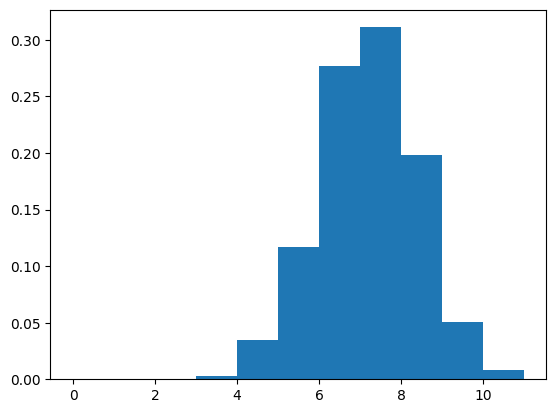

In [23]:
# Fuegen Sie hier Ihre Loesung ein.
def get_hypgeom_trials_list(nTrials : int, m : int, r : int, n : int):
    trials_list = np.zeros(nTrials)
    for i in range(nTrials):
        trials_list[i] = rhypgeom(m, r, n)
    return trials_list

nTrials = 1000
z = get_hypgeom_trials_list(nTrials, m = 30, r = 10, n = 20)

right_border = 12
counts, edges = np.histogram(z, np.arange(0, right_border, 1), density=True)
plt.stairs(counts, edges, fill=True)
plt.show()

d) Obwohl jede $n$-elementige Teilmenge mit derselben Wahrscheinlichkeit auftritt, empfindet man Mengen $\omega \subset \{1,2,\ldots,m\}$, die viele aufeinander folgende Zahlen enthalten, als weniger "zufällig". Diese Eigenschaft quantifizieren wir nun durch die Zahl

\begin{equation} X(\omega) := \max\{ k \, : \, k \text{ aufeinander folgende Zahlen gehören zu } \omega \}\, . \end{equation}

Explizite Formeln für die Wahrscheinlichkeiten

\begin{equation} p_X(k) = \mathbb{P}[X = k] \end{equation}

unter der Gleichverteilung auf den $n$-elementigen Teilmengen von $\{1,2,\ldots,m\}$ sind schwierig zu finden. Ein möglicher Ausweg sind Monte Carlo Schätzer. Dazu simuliert man $s$ zufällige $n$-elementige Teilmengen $\omega_1, \ldots, \omega_s$ und berechnet die relativen Häufigkeiten

\begin{equation} \hat p_X(k) = \frac{ \big|\{ 1 \leq i \leq s \, : \, X(\omega_i) = k \}\big| }{s} \end{equation}

als Schätzwert für die Wahrscheinlichkeiten $p_X(k)$.

Berechnen Sie Monte-Carlo Schätzer für $n=15$, $m=30$ und verschiedene Werte $s$ zwischen $1$ und $1000$. Stellen Sie $\hat p_X$ jeweils graphisch dar.

In [28]:
# Fuegen Sie hier Ihre Loesung ein.
def get_amount_of_following_numbers(subset : list):
    subset.sort()
    temp_amount = 1
    max_amount = 1
    for i in range(len(subset) - 1):
        if (subset[i]+1) == subset[i+1]:
            temp_amount += 1
        else:
            if temp_amount > max_amount: 
                max_amount = temp_amount
            temp_amount = 1
    return max_amount

def plot_monte_carlo_empirical_distribution(nSubsets : int):
    m = 30
    n = 15
    values_list = []
    for _ in range(nSubsets):
        subset = rsubset(m, n)
        values_list.append(get_amount_of_following_numbers(subset))

    counts, edges = np.histogram(values_list, np.arange(0, 16, 1), density=True)
    plt.stairs(counts, edges, fill=True)
    plt.show()

interactive(plot_monte_carlo_empirical_distribution, nSubsets=(1, 1000, 1))   

interactive(children=(IntSlider(value=500, description='nSubsets', max=1000, min=1), Output()), _dom_classes=(…